In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve

In [15]:
datasets = {
    'x_train': pd.read_csv('q4xTrain.csv'),
    'x_test': pd.read_csv('q4xTest.csv'),
    'y_train': pd.read_csv('q4yTrain.csv')['label'],
    'y_test': pd.read_csv('q4yTest.csv')['label']
}

In [16]:
datasets['x_train'].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.3,0.74,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8
1,8.0,0.71,0.00,2.6,0.080,11.0,34.0,0.99760,3.44,0.53,9.5
2,8.0,0.50,0.39,2.6,0.082,12.0,46.0,0.99850,3.43,0.62,10.7
3,8.9,0.40,0.32,5.6,0.087,10.0,47.0,0.99910,3.38,0.77,10.5
4,12.5,0.38,0.60,2.6,0.081,31.0,72.0,0.99960,3.10,0.73,10.5


In [17]:
datasets['x_train'].sample(3, axis=1).head()

,total sulfur dioxide,fixed acidity,density
0,45.0,7.3,0.99576
1,34.0,8.0,0.99760
2,46.0,8.0,0.99850
3,47.0,8.9,0.99910
4,72.0,12.5,0.99960


In [18]:
def normalize(df: pd.DataFrame) -> pd.DataFrame:
    scaler = MinMaxScaler()
    return pd.DataFrame(scaler.fit_transform(df))

In [19]:
datasets['x_train'] = normalize(datasets['x_train'])
datasets['x_test'] = normalize(datasets['x_test'])

In [20]:
datasets['x_train'].head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.238938,0.424658,0.08,0.054795,0.136895,0.126761,0.245283,0.417768,0.393701,0.079755,0.215385
1,0.300885,0.404110,0.00,0.116438,0.113523,0.140845,0.176101,0.552863,0.551181,0.098160,0.169231
2,0.300885,0.260274,0.39,0.116438,0.116861,0.154930,0.251572,0.618943,0.543307,0.153374,0.353846
3,0.380531,0.191781,0.32,0.321918,0.125209,0.126761,0.257862,0.662996,0.503937,0.245399,0.323077
4,0.699115,0.178082,0.60,0.116438,0.115192,0.422535,0.415094,0.699706,0.283465,0.220859,0.323077


In [21]:
logistic = LogisticRegression(penalty='none')
logistic.fit(datasets['x_train'], datasets['y_train'])
logistic.score(datasets['x_test'], datasets['y_test'])

0.8708333333333333

In [22]:
pca = PCA(n_components= 0.95)
pca.fit(datasets['x_train'], datasets['y_train'])

PCA(n_components=0.95)

In [23]:

transformed_data = {}
transformed_data['x_train'] = pca.transform(datasets['x_train'])
transformed_data['x_test'] = pca.transform(datasets['x_test'])

In [24]:
pd.DataFrame(pca.components_, columns=datasets['x_train'].columns)

,0,1,2,3,4,5,6,7,8,9,10
0,0.516005,-0.216783,0.659618,0.069609,0.069190,-0.070419,-0.017542,0.331899,-0.325976,0.135265,-0.045115
1,-0.043845,0.055450,-0.004601,0.072068,0.034932,0.468589,0.811551,0.135593,-0.047086,0.027100,-0.298395
2,-0.126606,-0.302820,0.307587,0.008599,-0.064755,0.261745,0.194942,-0.419584,0.067290,0.113914,0.702372
3,0.345624,0.442170,-0.193309,0.417466,-0.136432,0.162788,-0.006966,0.381402,0.157379,-0.120355,0.493458
4,-0.249667,-0.209510,0.012746,0.243980,0.226836,0.190165,-0.220047,0.325214,0.442468,0.624303,-0.082146
5,0.078793,0.429272,-0.175787,-0.191407,0.373763,-0.181517,0.134635,-0.146648,-0.377419,0.590590,0.196108
6,-0.312479,0.195807,0.341246,0.239902,0.089953,-0.671755,0.364869,0.067819,0.285217,-0.088923,0.060687
7,-0.238429,-0.141480,-0.109941,0.742200,0.203840,0.020429,-0.109743,-0.171015,-0.512173,-0.105326,-0.059288


In [25]:
logisticPCA = LogisticRegression(penalty='none')
logisticPCA.fit(transformed_data['x_train'], datasets['y_train'])
logisticPCA.score(transformed_data['x_test'], datasets['y_test'])

0.8625

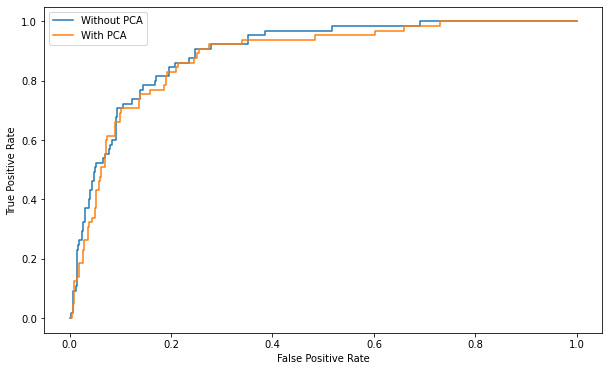

In [26]:
falsepos, truepos, _ = roc_curve(datasets['y_test'], logistic.predict_proba(datasets['x_test'])[:, 1])
falseposPCA, trueposPCA, _ = roc_curve(datasets['y_test'], logisticPCA.predict_proba(transformed_data['x_test'])[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(falsepos, truepos, label="Without PCA")
plt.plot(falseposPCA, trueposPCA, label="With PCA")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.savefig("roc")
plt.show()